Python: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
scipy: 1.7.1
numpy: 1.20.3
matplotlib: 3.4.3
pandas: 1.3.4
sklearn: 0.24.2


The number of rows & columns are (r,c): (12330, 18)
   Administrative  Administrative_Duration  Informational  \
0               0                      0.0              0   
1               0                      0.0              0   
2               0                      0.0              0   
3               0                      0.0              0   
4               0                      0.0              0   

   Informational_Duration  ProductRelated  ProductRelated_Duration  \
0                     0.0               1                 0.000000   
1                     0.0               2                64.000000   
2                     0.0               1                 0.000000   
3                     0.0               2                 2.666667   
4                     0.0              10               627.500000   

   Bounc

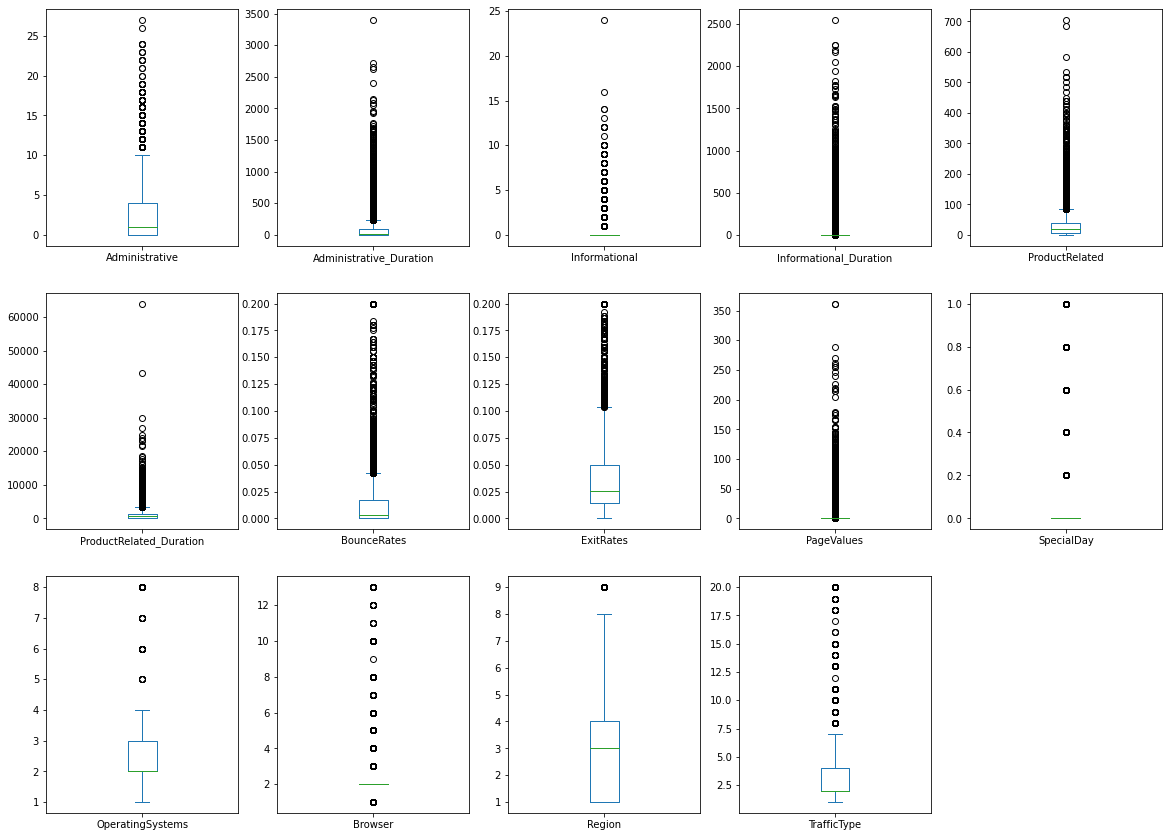


 hist: 



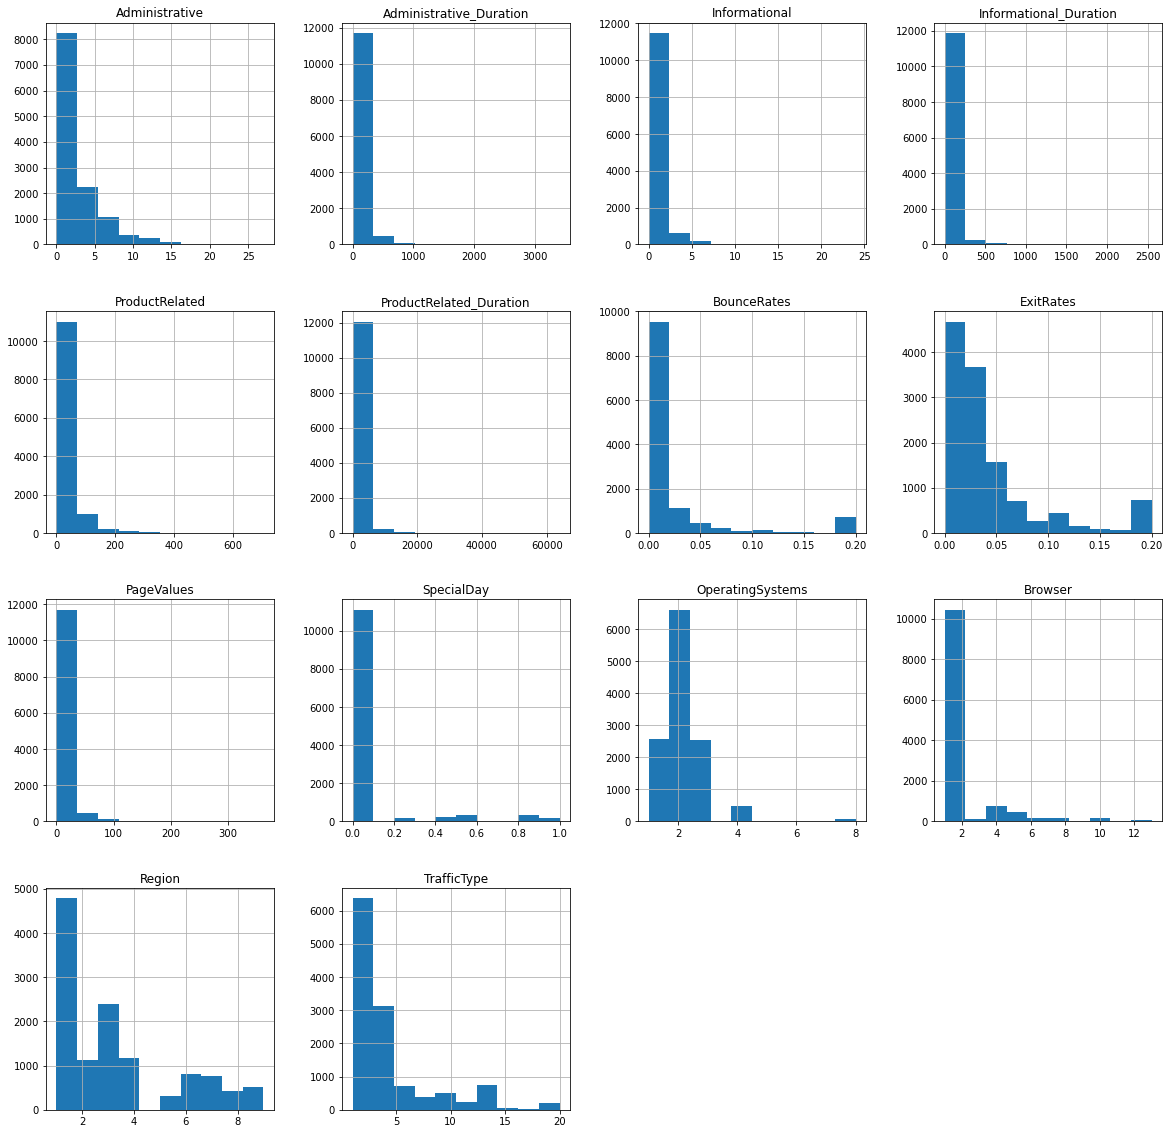


 scatter_matrix: NOT WORKS



In [1]:
# Load libraries
import sys
import scipy
import numpy
import pandas
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

# version check
print("Python: {}".format(sys.version))
print("scipy: {}".format(scipy.__version__))
print("numpy: {}".format(numpy.__version__))
print("matplotlib: {}".format(matplotlib.__version__))
print("pandas: {}".format(pandas.__version__))
print("sklearn: {}".format(sklearn.__version__))
print("\n")


# Load dataset from the UCI Machine Learning repository
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv"
dataset = pandas.read_csv(url)

# DATA VISUALISATION
# Dimensions of Dataset: shape
print("The number of rows & columns are (r,c): " + str(dataset.shape))

# For a quick look into the dataset: head
print(str(dataset.head()))

# For a quick look into the dataset: tail
print(str(dataset.tail()))

print(str(dataset.dtypes))

# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(dataset.describe()))

# To see how many rows(instances) correspond to each class: groupby
print("\n The following are the target classes: \n")
print(str(dataset.groupby('Revenue').size()))


# To visualise univariate(plots of individual variables) plots: box and whisker plots
# For better idea of variable distribution
print("\n plot: \n")
dataset.plot(kind='box', subplots=True, layout=(4, 5), figsize=(20,20), sharex=False, sharey=False)
plt.show()

# To visualise as a histogram: hist
print("\n hist: \n")
dataset.hist(figsize=(20,20))
plt.show()

# To visualise multivariate(plots of individual variables) plots: scatter plot matrix
print("\n scatter_matrix: NOT WORKS\n")
#scatter_matrix(frame=dataset,figsize=(40,40))
#plt.show()


   Administrative  Administrative_Duration  Revenue
0               0                      0.0    False
1               0                      0.0    False
2               0                      0.0    False
3               0                      0.0    False
4               0                      0.0    False
5               0                      0.0    False
6               0                      0.0    False
The number of rows & columns are (r,c): (12330, 3)
   Administrative  Administrative_Duration  Revenue
0               0                      0.0        0
1               0                      0.0        0
2               0                      0.0        0
3               0                      0.0        0
4               0                      0.0        0
5               0                      0.0        0
6               0                      0.0        0
       Administrative  Administrative_Duration       Revenue
count    12330.000000             12330.000000  12330.00

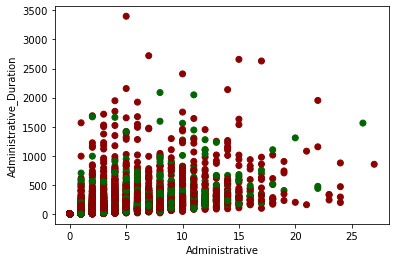

       Administrative  Administrative_Duration       Revenue
count    12330.000000             12330.000000  12330.000000
mean         2.315166                80.818611      0.154745
std          3.321784               176.779107      0.361676
min          0.000000                 0.000000      0.000000
25%          0.000000                 0.000000      0.000000
50%          1.000000                 7.500000      0.000000
75%          4.000000                93.256250      0.000000
max         27.000000              3398.750000      1.000000

 hist: 



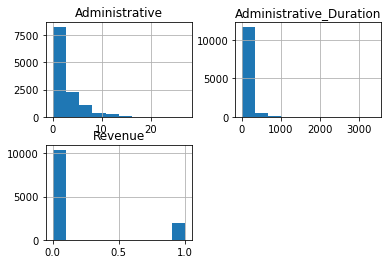


 scatter_matrix: 



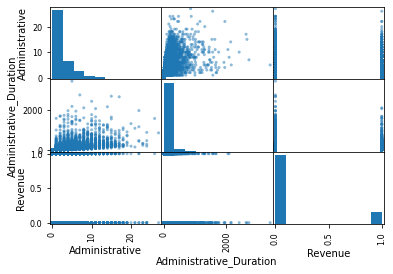

In [2]:
adm_work_revenue = dataset.loc[:, ['Administrative', 'Administrative_Duration', 'Revenue']]

#adm_work = adm_work_revenue[(adm_work_revenue['Administrative'] != 0) & (adm_work_revenue['Administrative_Duration'] != 0)]
print(str(adm_work_revenue.head(7)))

# DATA VISUALISATION
# Dimensions of Dataset: shape
print("The number of rows & columns are (r,c): " + str(adm_work_revenue.shape))

label_mapping = {False:0, True: 1}
adm_work_revenue['Revenue'] = adm_work_revenue['Revenue'].map(label_mapping, na_action=None)

print(str(adm_work_revenue.head(7)))
# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(adm_work_revenue.describe()))


# To see how many rows(instances) correspond to each class: groupby
print("\n The following are the target classes: \n")
print(str(adm_work_revenue.groupby('Revenue').size()))

# To visualise univariate(plots of individual variables) plots: box and whisker plots
# For better idea of variable distribution

print("\n plot: \n")
def color_map(value):
    if value:
        return "DarkGreen"
    else:
        return "DarkRed"

color = [color_map(i) for i in adm_work_revenue['Revenue']]
#info_dur_prod_dur_revenue.plot(kind='box', subplots=True, layout=(1, 3), sharex=False, sharey=False)
plt.scatter(x=adm_work_revenue['Administrative'], y=adm_work_revenue['Administrative_Duration'], c=color)
plt.xlabel('Administrative')
plt.ylabel('Administrative_Duration')
plt.show()


# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(adm_work_revenue.describe()))

# To visualise as a histogram: hist
print("\n hist: \n")
adm_work_revenue.hist()
plt.show()

# To visualise multivariate(plots of individual variables) plots: scatter plot matrix
print("\n scatter_matrix: \n")
scatter_matrix(adm_work_revenue)
plt.show()
# Note the diagonal relationship in the plots, signifies high correlation
# Viewing the plots could be helpful with the choice of algo.


   Informational_Duration  ProductRelated_Duration  Revenue
0                     0.0                 0.000000    False
1                     0.0                64.000000    False
2                     0.0                 0.000000    False
3                     0.0                 2.666667    False
4                     0.0               627.500000    False
5                     0.0               154.216667    False
6                     0.0                 0.000000    False
The number of rows & columns are (r,c): (12330, 3)
       Informational_Duration  ProductRelated_Duration       Revenue
count            12330.000000             12330.000000  12330.000000
mean                34.472398              1194.746220      0.154745
std                140.749294              1913.669288      0.361676
min                  0.000000                 0.000000      0.000000
25%                  0.000000               184.137500      0.000000
50%                  0.000000               598.936905 

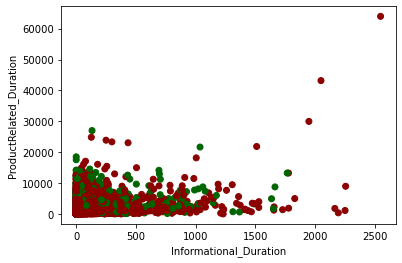


 hist: 



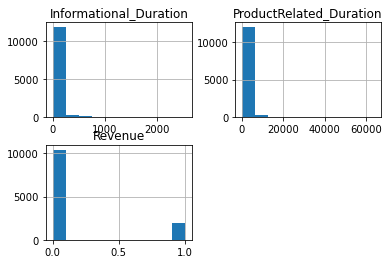


 scatter_matrix: 



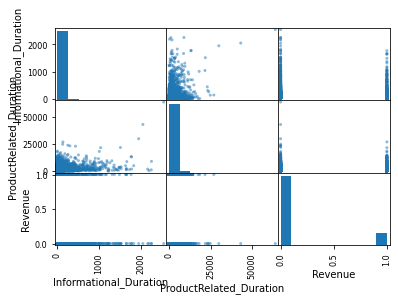

In [3]:
info_dur_prod_dur_revenue = dataset.loc[:, ['Informational_Duration', 'ProductRelated_Duration',  'Revenue']]

#subset_info_dur_prod_dur_revenue = subset_info_dur_prod_dur_revenue[(subset_info_dur_prod_dur_revenue['Informational_Duration'] != 0) & (subset_info_dur_prod_dur_revenue['Informational_Duration'] != 0)]
print(str(info_dur_prod_dur_revenue.head(7)))

# DATA VISUALISATION
# Dimensions of Dataset: shape
print("The number of rows & columns are (r,c): " + str(info_dur_prod_dur_revenue.shape))


label_mapping = {False:0, True: 1}
info_dur_prod_dur_revenue['Revenue'] = info_dur_prod_dur_revenue['Revenue'].map(label_mapping, na_action=None)


# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(info_dur_prod_dur_revenue.describe()))



# To see how many rows(instances) correspond to each class: groupby
print("\n The following are the target classes: \n")
print(str(info_dur_prod_dur_revenue.groupby('Revenue').size()))

# To visualise univariate(plots of individual variables) plots: box and whisker plots
# For better idea of variable distribution

print("\n plot: \n")
def color_map(value):
    if value:
        return "DarkGreen"
    else:
        return "DarkRed"

color = [color_map(i) for i in info_dur_prod_dur_revenue['Revenue']]
#info_dur_prod_dur_revenue.plot(kind='box', subplots=True, layout=(1, 3), sharex=False, sharey=False)
plt.scatter(x=info_dur_prod_dur_revenue['Informational_Duration'], y=info_dur_prod_dur_revenue['ProductRelated_Duration'], c=color)
plt.xlabel('Informational_Duration')
plt.ylabel('ProductRelated_Duration')
plt.show()

# To visualise as a histogram: hist
print("\n hist: \n")
info_dur_prod_dur_revenue.hist()
plt.show()

# To visualise multivariate(plots of individual variables) plots: scatter plot matrix
print("\n scatter_matrix: \n")
scatter_matrix(info_dur_prod_dur_revenue)
plt.show()
# Note the diagonal relationship in the plots, signifies high correlation
# Viewing the plots could be helpful with the choice of algo.



   Informational  Informational_Duration  ProductRelated  \
0              0                     0.0               1   
1              0                     0.0               2   
2              0                     0.0               1   
3              0                     0.0               2   
4              0                     0.0              10   
5              0                     0.0              19   
6              0                     0.0               1   

   ProductRelated_Duration  Revenue  
0                 0.000000    False  
1                64.000000    False  
2                 0.000000    False  
3                 2.666667    False  
4               627.500000    False  
5               154.216667    False  
6                 0.000000    False  
The number of rows & columns are (r,c): (12330, 5)
       Informational  Informational_Duration  ProductRelated  \
count   12330.000000            12330.000000    12330.000000   
mean        0.503569               3

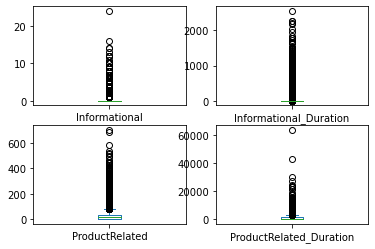


 hist: 



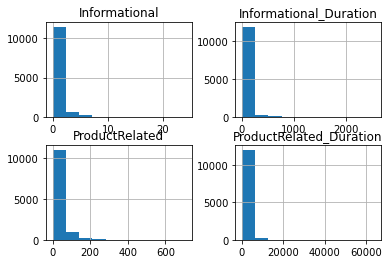


 Scaled scatter_matrix: 



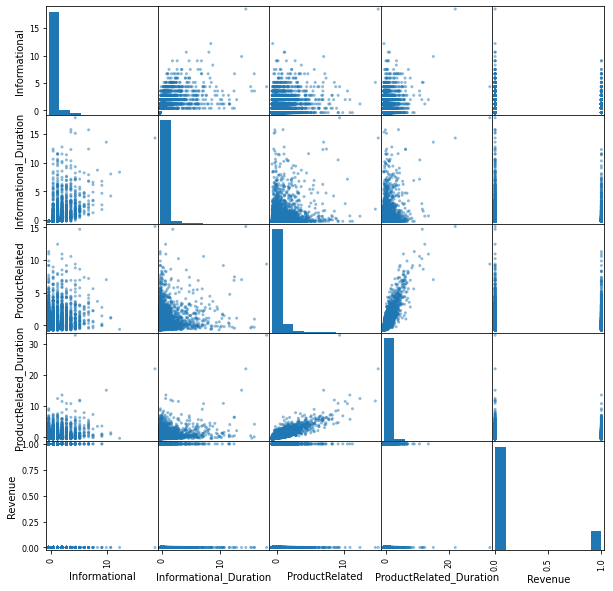

[1. 1. 0. ... 0. 0. 0.]
[1. 0. 0. ... 0. 0. 0.]
KNN: k= 3 accuracy mean =  0.8056555711059185
KNN: k= 5 accuracy mean =  0.8229921021967115
KNN: k= 7 accuracy mean =  0.8298870098296105
KNN: k= 9 accuracy mean =  0.83546304802185
KNN: k= 11 accuracy mean =  0.8383019825685226
KNN: k= 13 accuracy mean =  0.8398229724758576
KNN: k= 15 accuracy mean =  0.8415466993840823
KNN: k= 17 accuracy mean =  0.8428642330006104
KNN: k= 19 accuracy mean =  0.843979132371951
KNN: k= 21 accuracy mean =  0.8444860262520268
KNN: k= 23 accuracy mean =  0.8439793378833558

The accuracy score is: 0.8410381184103812


In [4]:
info_prod_revenue = dataset.loc[:, ['Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',  'Revenue']]

#subset_info_dur_prod_dur_revenue = subset_info_dur_prod_dur_revenue[(subset_info_dur_prod_dur_revenue['Informational_Duration'] != 0) & (subset_info_dur_prod_dur_revenue['Informational_Duration'] != 0)]
print(str(info_prod_revenue.head(7)))

# DATA VISUALISATION
# Dimensions of Dataset: shape
print("The number of rows & columns are (r,c): " + str(info_prod_revenue.shape))


# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(info_prod_revenue.describe()))

# To see how many rows(instances) correspond to each class: groupby
print("\n The following are the target classes: \n")
print(str(info_prod_revenue.groupby('Revenue').size()))

# To visualise univariate(plots of individual variables) plots: box and whisker plots
# For better idea of variable distribution

print("\n plot: \n")

info_prod_revenue.plot(kind='box', subplots=True, layout=(2, 2), sharex=False, sharey=False)
#plt.scatter(x=info_prod_revenue['Informational_Duration'], y=info_prod_revenue['ProductRelated_Duration'], c=color)
#plt.xlabel('Informational_Duration')
#plt.ylabel('ProductRelated_Duration')
plt.show()

# To visualise as a histogram: hist
print("\n hist: \n")
info_prod_revenue.hist()
plt.show()

#array = info_prod_revenue.values
X = info_prod_revenue.values[:, 0:4]
Y = info_prod_revenue.values[:, 4]
scaler = StandardScaler().fit(X)
X_scaled = scaler.transform(X)
#print(X_scaled)
dataset_scaled = pandas.DataFrame({'Informational':X_scaled[:,0], 
                                   'Informational_Duration':X_scaled[:,1], 
                                   'ProductRelated':X_scaled[:,2], 
                                   'ProductRelated_Duration':X_scaled[:,3], 
                                   'Revenue':Y})

label_mapping = {False:0, True: 1}
dataset_scaled['Revenue'] = dataset_scaled['Revenue'].map(label_mapping, na_action=None)

# To visualise multivariate(plots of individual variables) plots: scatter plot matrix
print("\n Scaled scatter_matrix: \n")
scatter_matrix(dataset_scaled, figsize=(10,10))
plt.show()

# MODEL EVALUATION
# In the following example, we use the same set for testing and validating
# Split-out validation dataset: 80% training and 20% testing-validation
array = dataset_scaled.values
X_scaled = array[:, 0:4]
Y_scaled = array[:, 4]
test_size = 0.20
seed = 7
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X_scaled, Y_scaled, test_size=test_size, random_state=seed)


# Test options and evaluation metric
# Using 10-fold cross validation
print(Y_train)
print(Y_test)
kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)

for k in range(3,25,2):
    cv_results_knn = model_selection.cross_val_score(KNeighborsClassifier(n_neighbors=k, weights='uniform'), X_train, Y_train, cv=kfold)
    print("KNN: k=", k, "accuracy mean = ", cv_results_knn.mean())


# Make predictions on validation dataset
knn = KNeighborsClassifier(n_neighbors=23, weights='uniform')
knn.fit(X_train, Y_train)
predictions = knn.predict(X_test)

print("\nThe accuracy score is: " + str(accuracy_score(Y_test, predictions)))

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object
Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')
   Admi

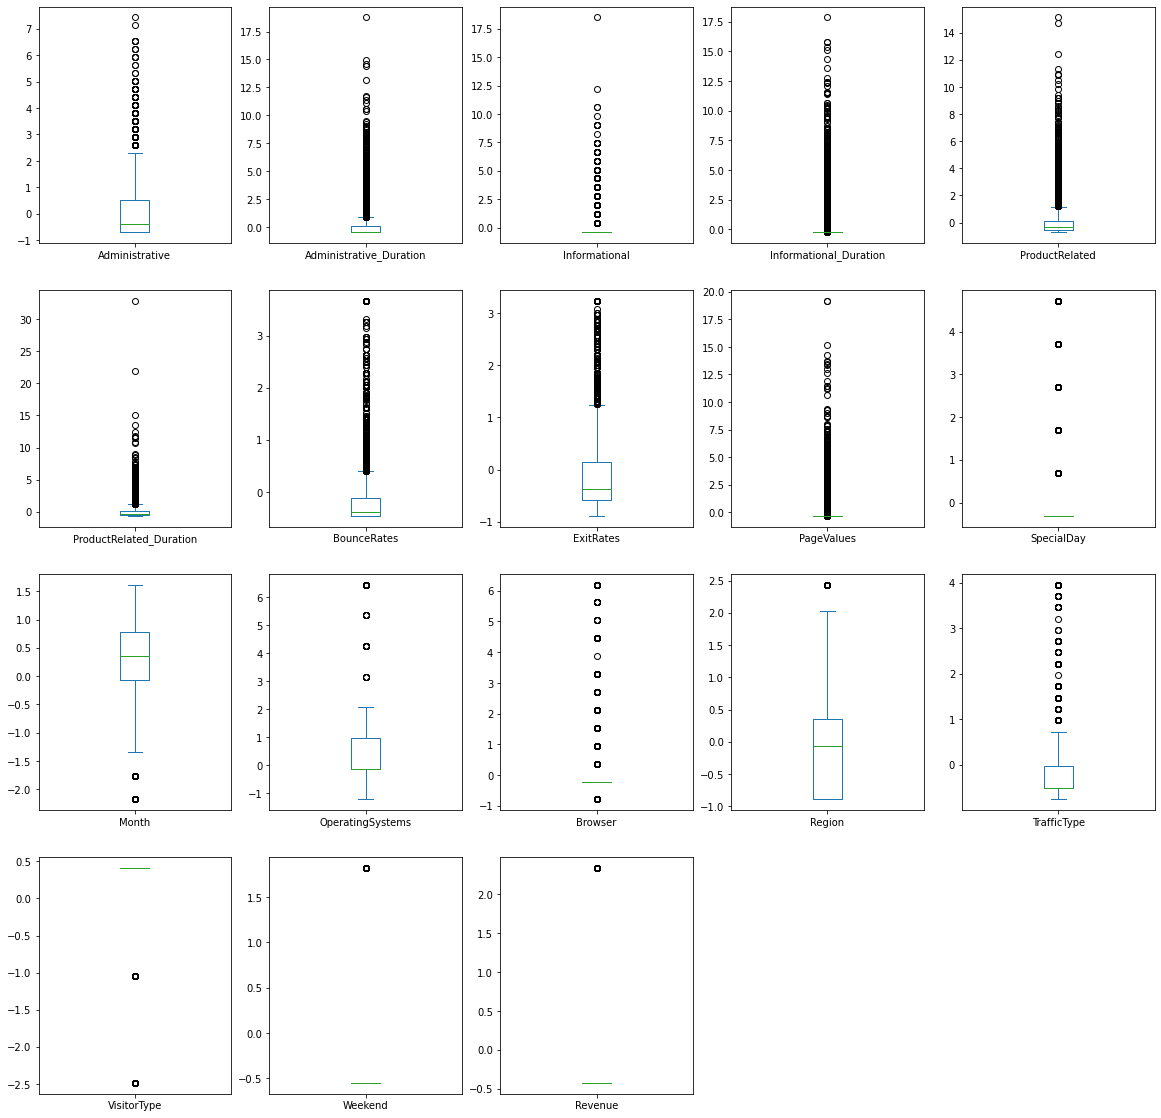


 hist: 



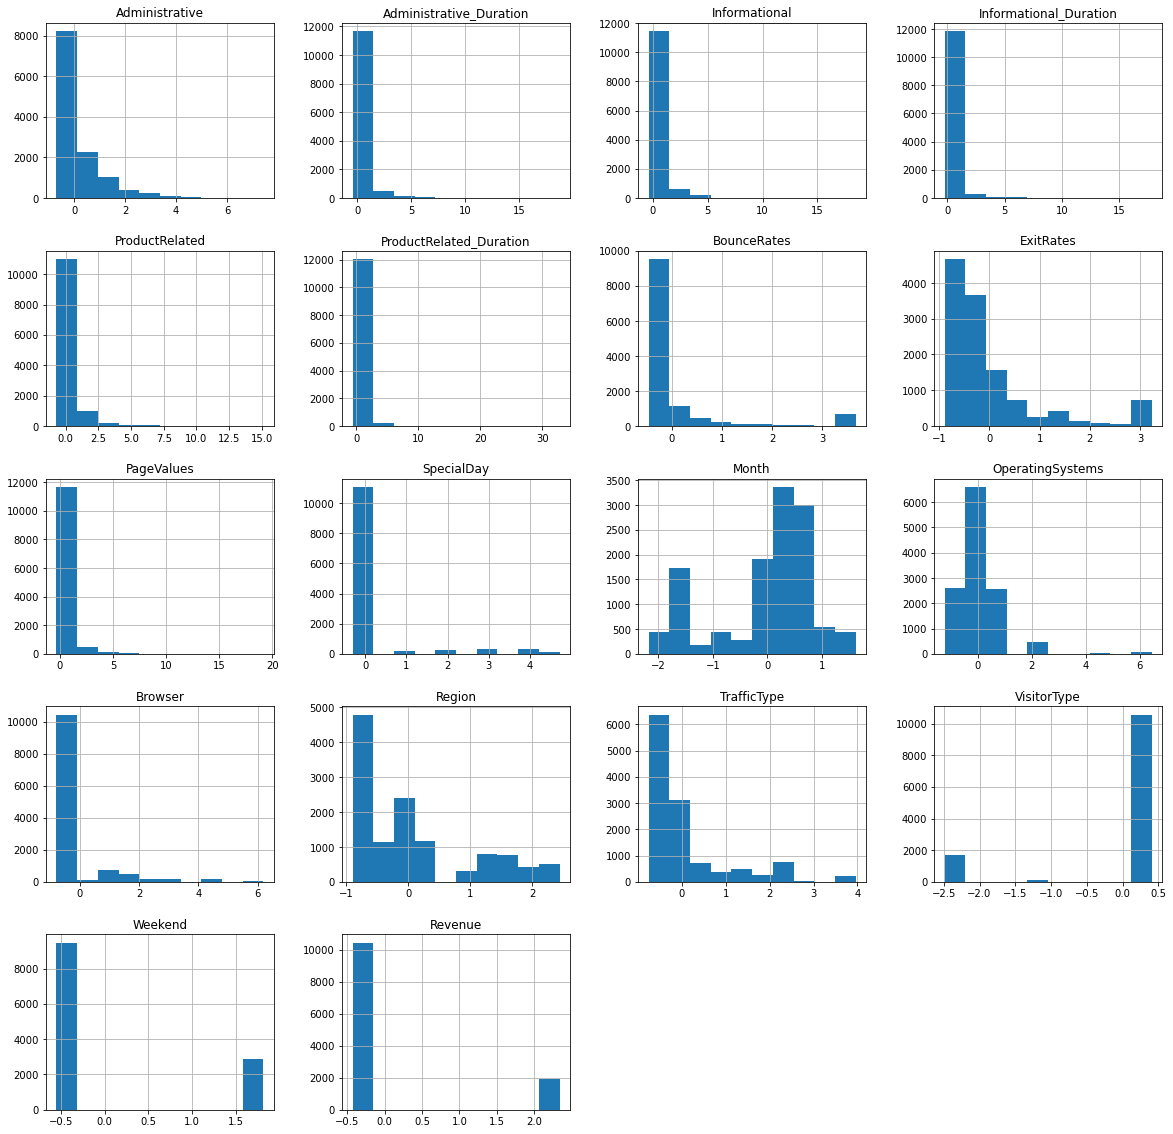


 scatter_matrix: 



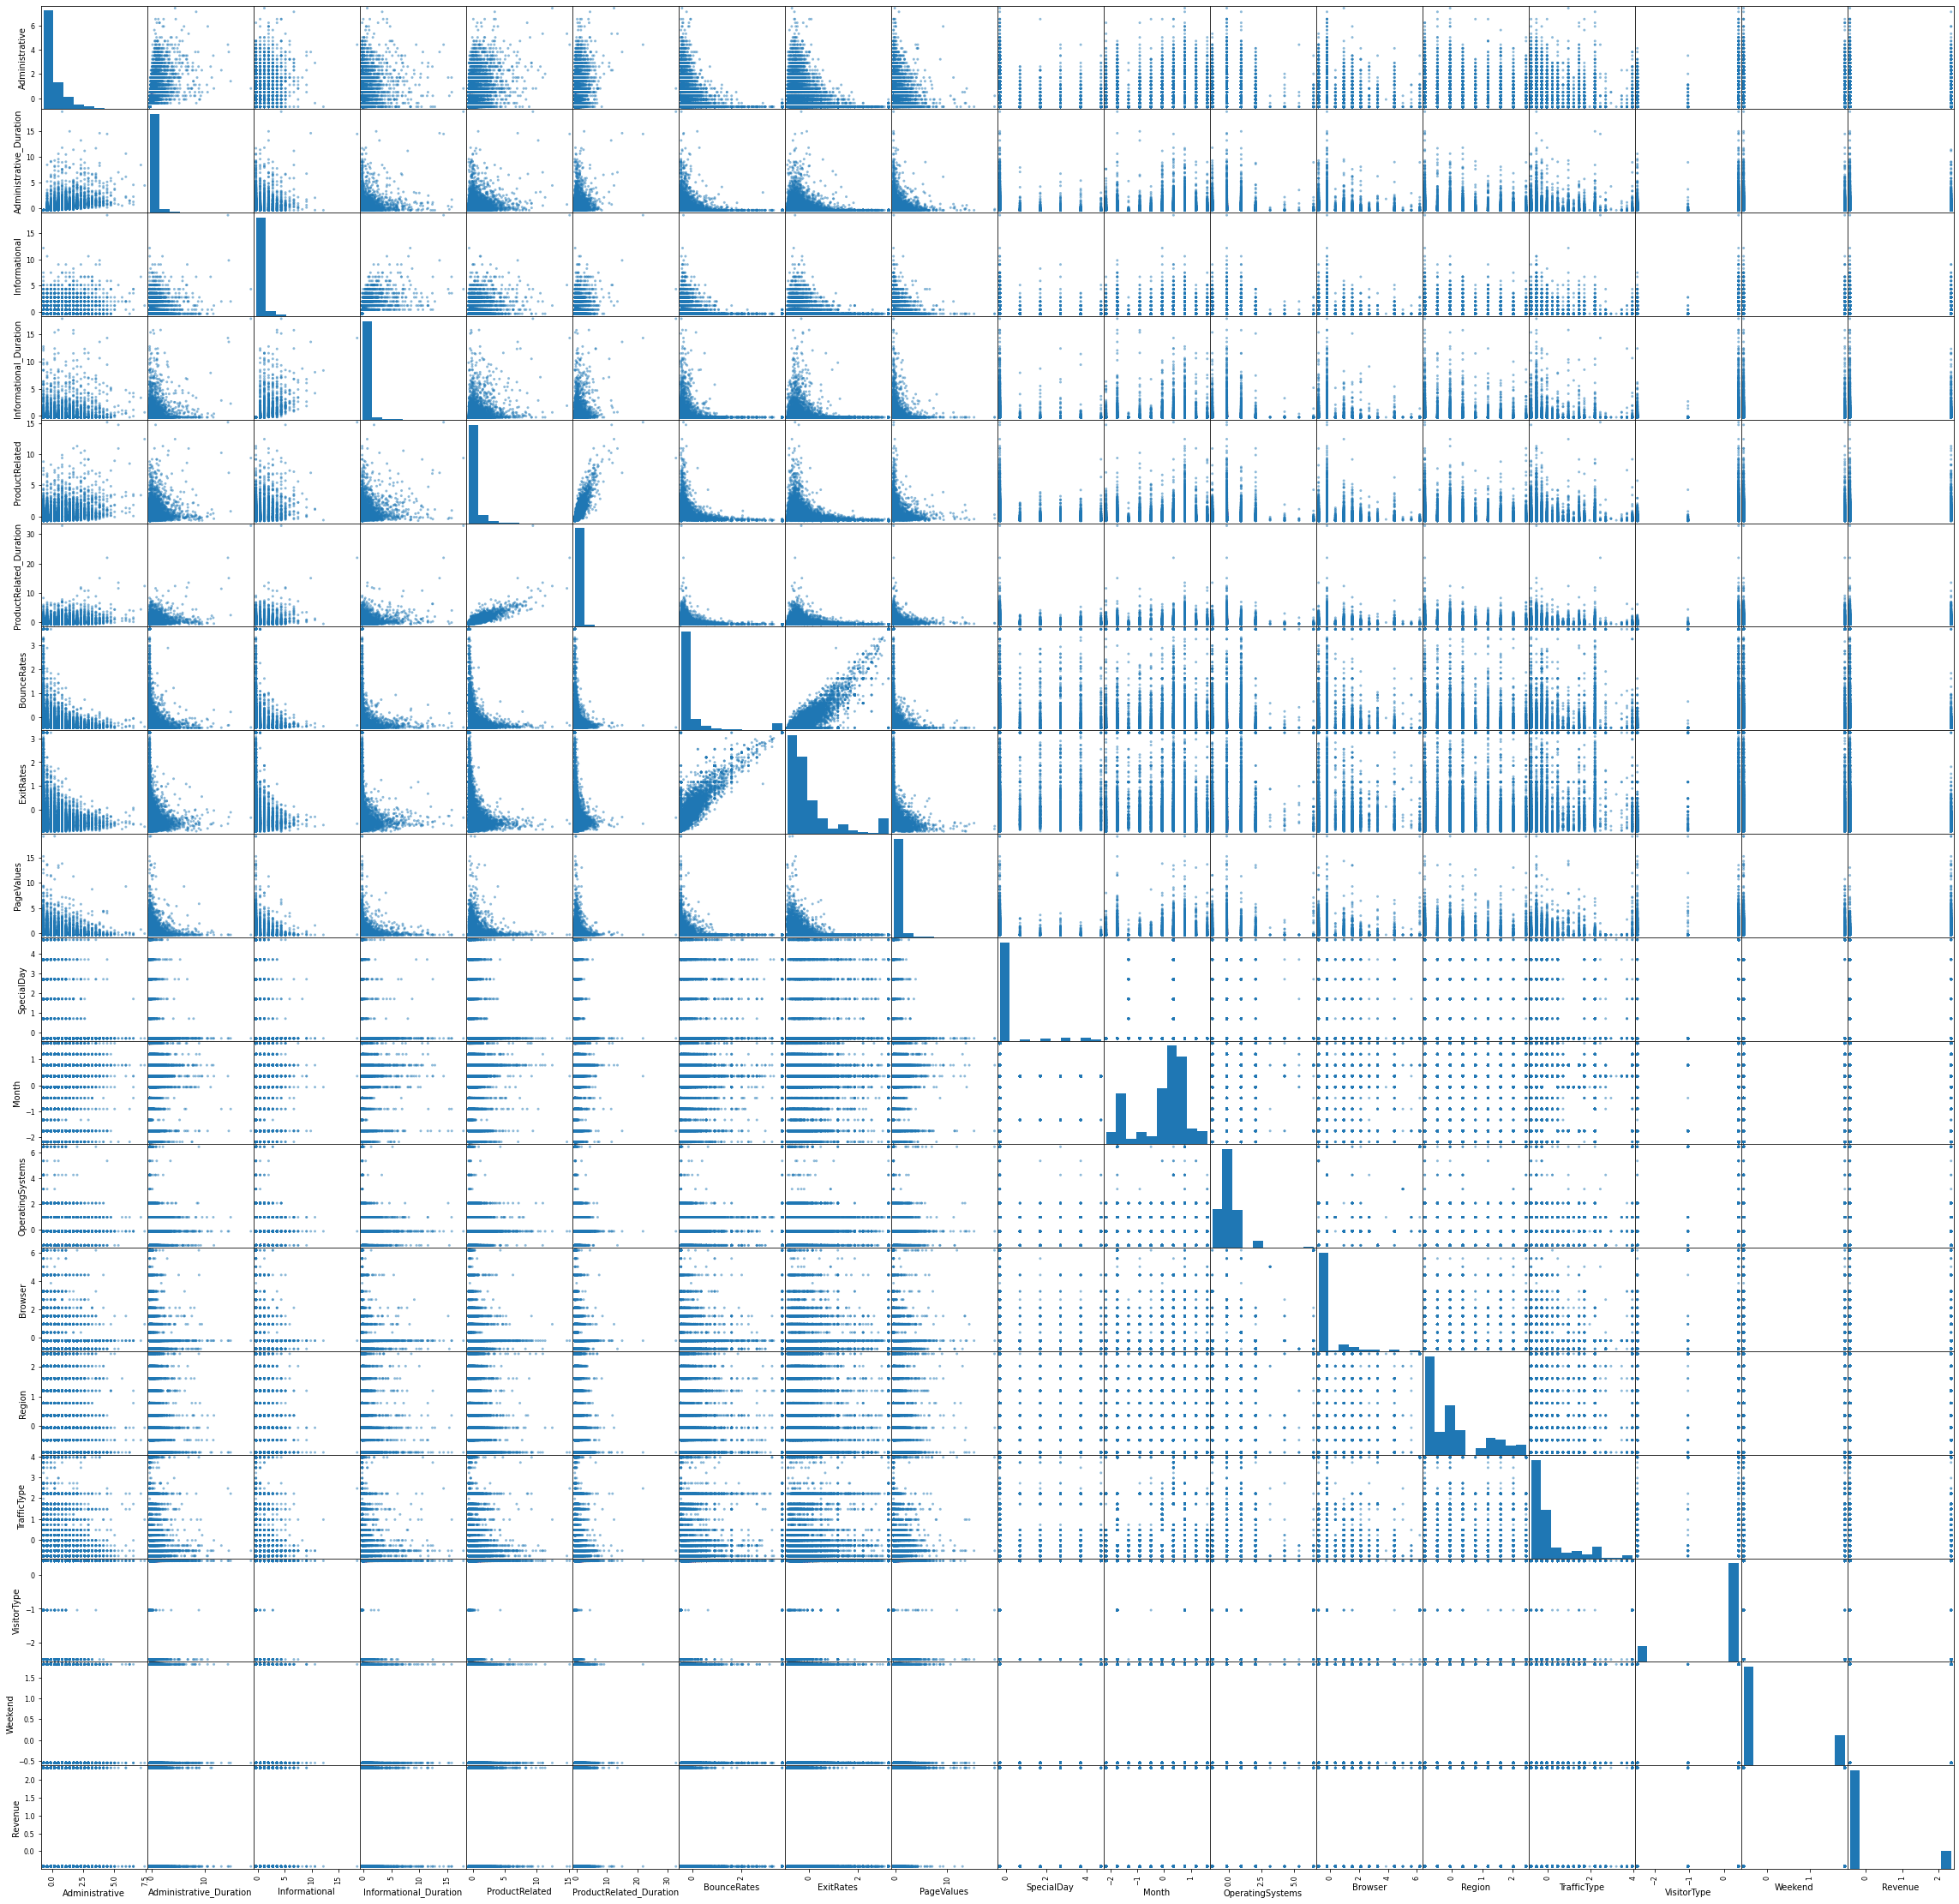

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,-1.233426,-0.790293,-0.894178,-0.762629,0.407786,-0.550552,-0.427872
1,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.590903,-0.457683,1.171473,-0.317178,-0.308821,-1.334959,-0.136078,-0.207952,-0.894178,-0.514182,0.407786,-0.550552,-0.427872
2,-0.696993,-0.457191,-0.396478,-0.244931,-0.691003,-0.624348,3.667189,3.229316,-0.317178,-0.308821,-1.334959,2.058618,-0.790293,2.437081,-0.265735,0.407786,-0.550552,-0.427872
3,-0.696993,-0.457191,-0.396478,-0.244931,-0.668518,-0.622954,0.573535,1.994610,-0.317178,-0.308821,-1.334959,0.961270,-0.207952,-0.477771,-0.017289,0.407786,-0.550552,-0.427872
4,-0.696993,-0.457191,-0.396478,-0.244931,-0.488636,-0.296430,-0.045196,0.142551,-0.317178,-0.308821,-1.334959,0.961270,0.374389,-0.894178,-0.017289,0.407786,1.816360,-0.427872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,0.206173,0.363075,-0.396478,-0.244931,0.478227,0.307822,-0.310366,-0.288966,0.342125,-0.308821,-1.756881,2.058618,2.121412,-0.894178,-0.762629,0.407786,1.816360,-0.427872
12326,-0.696993,-0.457191,-0.396478,-0.244931,-0.601062,-0.380957,-0.457683,-0.447364,-0.317178,-0.308821,0.774654,0.961270,-0.207952,-0.894178,0.976499,0.407786,1.816360,-0.427872
12327,-0.696993,-0.457191,-0.396478,-0.244931,-0.578577,-0.528063,1.261014,0.897093,-0.317178,-0.308821,0.774654,0.961270,-0.207952,-0.894178,2.218733,0.407786,1.816360,-0.427872
12328,0.507228,-0.032916,-0.396478,-0.244931,-0.376210,-0.443536,-0.457683,-0.453140,-0.317178,-0.308821,0.774654,-0.136078,-0.207952,-0.061364,1.721839,0.407786,-0.550552,-0.427872


In [5]:
dataset = pandas.read_csv(url)
print(str(dataset.dtypes))
columns = dataset.columns
print(str(columns))

print(str(dataset.head()))
label_mapping = {False:0, True: 1}
dataset['Revenue'] = dataset['Revenue'].map(label_mapping, na_action=None)
dataset['Weekend'] = dataset['Weekend'].map(label_mapping, na_action=None)

print(dataset['Weekend'])
print(dataset['Revenue'])

month_value = dataset['Month'].values
month_enc = LabelEncoder()
month_enc.fit(month_value)
month_encoded = month_enc.transform(month_value)
#print(month_encoded)
dataset['Month'] = month_encoded

vistor_type_value = dataset['VisitorType'].values
#print(vistor_type_value)
vistor_type_enc = LabelEncoder()
vistor_type_enc.fit(vistor_type_value)
vistor_type_encoded = vistor_type_enc.transform(vistor_type_value)
#print(vistor_type_encoded)
dataset['VisitorType'] = vistor_type_encoded

print(str(dataset.dtypes))

print(str(dataset.head()))
# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
print(str(dataset.describe()))


X = dataset.values

std_scaler = StandardScaler().fit(X)
X_scaled = std_scaler.transform(X)

print(str(X_scaled[0:5, :]))
dataset_scaled = pandas.DataFrame(data=X_scaled, columns=columns)
print("Scaled data frames")
print(str(dataset_scaled.head()))
print(str(dataset_scaled.describe()))
# For a statistical summary: describe
# This provides information such as mean, count, avg, max, min etc.
#print(str(dataset_scaled.describe()))



# To visualise univariate(plots of individual variables) plots: box and whisker plots
# For better idea of variable distribution
print("\n plot: \n")
dataset_scaled.plot(kind='box', subplots=True, layout=(4, 5), figsize=(20,20), sharex=False, sharey=False)
plt.show()

# To visualise as a histogram: hist
print("\n hist: \n")
dataset_scaled.hist(figsize=(20,20))
plt.show()

# To visualise multivariate(plots of individual variables) plots: scatter plot matrix
print("\n scatter_matrix: \n")
scatter_matrix(frame=dataset_scaled,figsize=(40,40))
plt.show()
dataset_scaled

In [6]:
from sklearn.cluster import AgglomerativeClustering

for k in range(5,7):
    clustering = AgglomerativeClustering(n_clusters = k, affinity='euclidean', linkage='ward')
    clustering.fit_predict(X_scaled)
    print("clusters ", clustering.n_clusters_)
    print("childerns ",clustering.children_.shape)
    print("n_leaves_ ",clustering.n_leaves_)
    print("labels ",clustering.labels_)
    print("n_features_in_ ",clustering.n_features_in_)
    print("\nPredicated cluster plot: \n")
    #plt.scatter(data[:,0], data[:,1], c=clustering.labels_, cmap='rainbow')
    #plt.show()



clusters  5
childerns  (12329, 2)
n_leaves_  12330
labels  [2 0 2 ... 0 0 0]
n_features_in_  18

Predicated cluster plot: 

clusters  6
childerns  (12329, 2)
n_leaves_  12330
labels  [5 0 5 ... 0 0 2]
n_features_in_  18

Predicated cluster plot: 



In [7]:
dataset = pandas.read_csv(url)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

array([[<AxesSubplot:title={'center':'Administrative'}>,
        <AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated'}>,
        <AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>],
       [<AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'SpecialDay'}>,
        <AxesSubplot:title={'center':'OperatingSystems'}>,
        <AxesSubplot:title={'center':'Browser'}>],
       [<AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'TrafficType'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

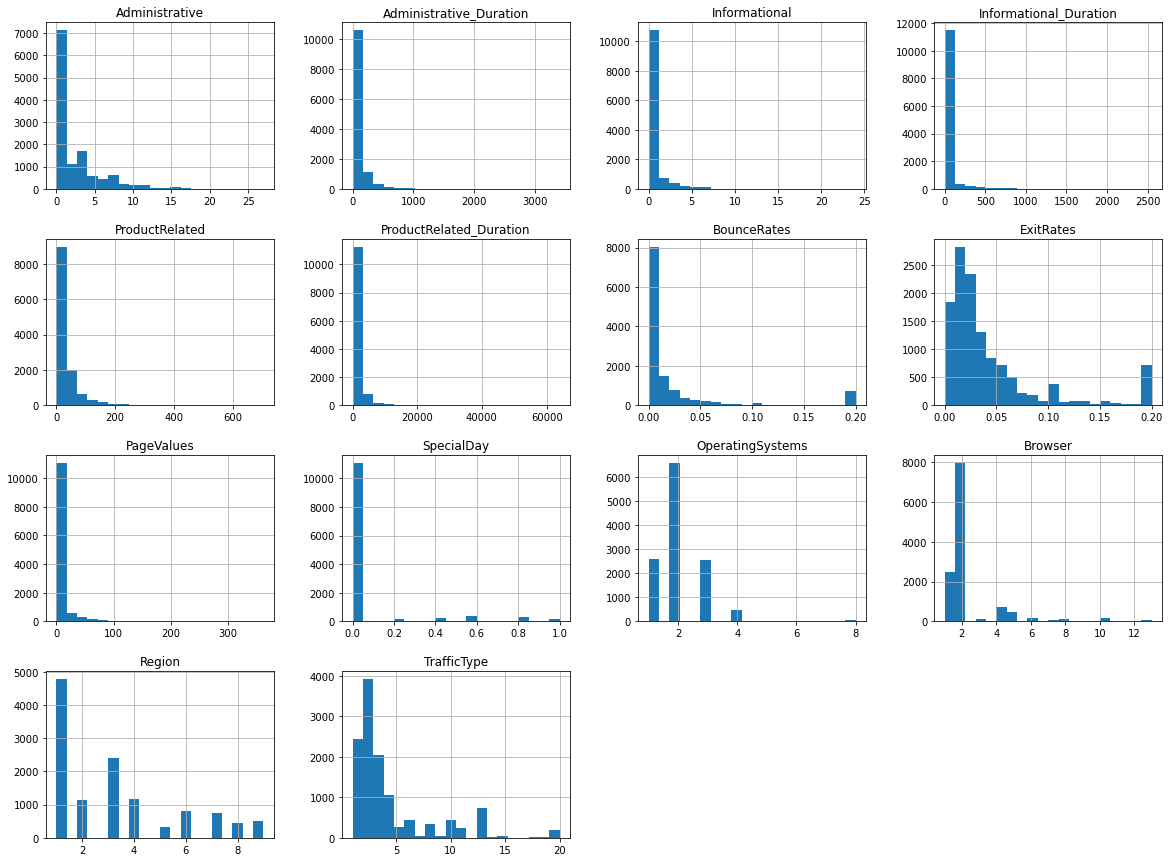

In [9]:
dataset.hist(bins=20, figsize=(20,15))

array([[<AxesSubplot:title={'center':'Administrative'}>,
        <AxesSubplot:title={'center':'Administrative_Duration'}>,
        <AxesSubplot:title={'center':'Informational'}>,
        <AxesSubplot:title={'center':'Informational_Duration'}>],
       [<AxesSubplot:title={'center':'ProductRelated'}>,
        <AxesSubplot:title={'center':'ProductRelated_Duration'}>,
        <AxesSubplot:title={'center':'BounceRates'}>,
        <AxesSubplot:title={'center':'ExitRates'}>],
       [<AxesSubplot:title={'center':'PageValues'}>,
        <AxesSubplot:title={'center':'SpecialDay'}>,
        <AxesSubplot:title={'center':'OperatingSystems'}>,
        <AxesSubplot:title={'center':'Browser'}>],
       [<AxesSubplot:title={'center':'Region'}>,
        <AxesSubplot:title={'center':'TrafficType'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

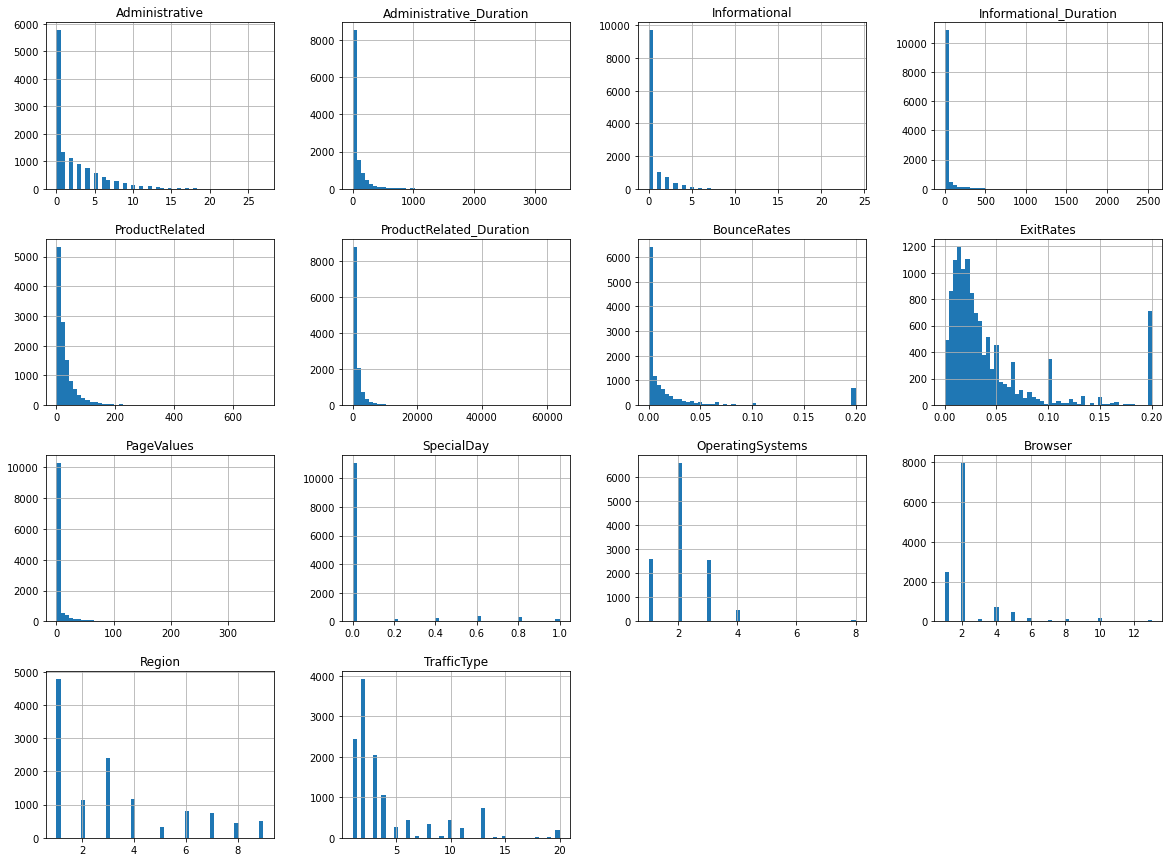

In [12]:
%matplotlib inline
dataset.hist(bins=50, figsize=(20,15))